````
importing the required modules
````

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

````
importing the dataset from specified directory
& assigning the number to the allphabet labels
````

In [2]:
ds = tf.keras.preprocessing.image_dataset_from_directory("asl_alphabet_train")
c = 0
dic = {}
for i in ds.class_names:
    if i in dic:
        pass
    else:
        dic[c] = i
    c+=1

Found 78000 files belonging to 26 classes.


In [3]:
print(dic)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


In [4]:
data = []
label = []
count = 0

````
converting the image to the array for training the model
````

In [5]:
import glob
l = ds.class_names
for i in l:
    for j in glob.glob(f"asl_alphabet_train/{i}/*.*"):
        image = tf.keras.preprocessing.image.load_img(j,color_mode="grayscale",target_size=(256,256))
        image = np.array(image)
        data.append(image)
        label.append(count)
    count += 1

````
converting the array to the ndarray
````

In [6]:
data = np.array(data)
label = np.array(label)

````
assigning the train and test dataset through train_test_split class of the sklearn.metrics
````

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.000000001,shuffle=True)

In [63]:
len(X_train)

77999

````
plotting the data through the matplotlib library for visual representation of the image
````

Text(0.5, 1.0, 'C')

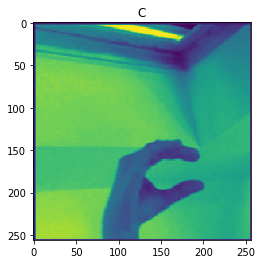

In [8]:
plt.imshow(X_test[0])
plt.title(dic[y_test[0]])

````
building the convolutional neural network for prediction
````

In [9]:
model = tf.keras.Sequential([
  keras.layers.Conv2D(16, (2,2), input_shape=(256,256,1), activation='relu'),
	keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

	keras.layers.Conv2D(32, (3,3), activation='relu'),
	keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'),

	keras.layers.Conv2D(64, (5,5), activation='relu'),
	keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'),
	
	keras.layers.Flatten(),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dropout(0.2),
	keras.layers.Dense(28, activation='softmax')
])

````
compiling the model with the loss, optimizer & metrics

In [10]:
model.compile(
    optimizer = "adam",
    loss = "SparseCategoricalCrossentropy",
    metrics = ['accuracy']
)

````
fitting the model with the train data image array is used as X_train data and label array is used as y_train
````

In [61]:
model.fit(X_train,y_train,epochs=1,batch_size=32,verbose=1)

2438/2438 [==============================] - 1778s 729ms/step - loss: 0.0989 - accuracy: 0.9669


````
saving the model using tensorflow
````

In [64]:
model.save("model.h5")

````
preparing the test model
````

In [65]:
test_data = []
test_label = []

In [66]:
count = 0
import glob
l = ds.class_names
for i in l:
    for j in glob.glob(f"asl_alphabet_test/{i}/*.*"):
        image = tf.keras.preprocessing.image.load_img(j,color_mode="grayscale",target_size=(256,256))
        image = np.array(image)
        test_data.append(image)
        test_label.append(count)
    count += 1

In [67]:
test_data = np.array(test_data)
test_label = np.array(test_label)

In [68]:
len(test_data)

26

In [69]:
len(test_label)

26

````
evaluating the model using test data
````

In [70]:
model.evaluate(test_data,test_label)

1/1 [==============================] - 0s 208ms/step - loss: 4.7968e-05 - accuracy: 1.0000


[4.796825669473037e-05, 1.0]

````
predicting the values using the test data
````

In [71]:
pred = model.predict(test_data)

In [72]:
pred = [np.argmax(i) for i in pred]

````
using the confusion metrix for representaion of predicted data
````

In [73]:
cm  = sklearn.metrics.confusion_matrix(test_label,pred)

````
creating the heatmap using seaborn library
````

[Text(0.5, 69.0, 'Real'), Text(132.0, 0.5, 'Predicted')]

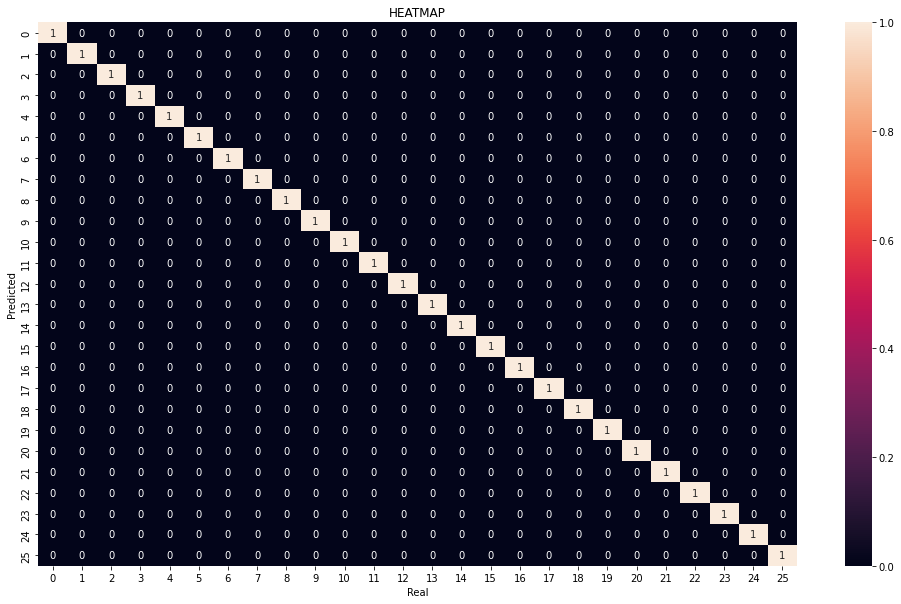

In [74]:
ax = plt.figure(figsize=(17,10))
ax = plt.title("HEATMAP")
ax = sns.heatmap(cm,annot=True)
ax.set(xlabel='Real', ylabel='Predicted')